<a href="https://colab.research.google.com/github/061095/biblioteca_pandas_/blob/main/Desafio_5_Prepare_seu_dataset_para_modelagem_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aplicação de conhecimentos de limpeza e organização de dados
(data cleaning & data wrangling) para estruturar uma base de
dados para modelagem. Boa parte do dia de um cientista de
dados é garantir a organização de suas bases para conseguir
um modelo preciso, dominar isso é fundamental na carreira.

##Contexto

Uma empresa do ramo de e-commerce contratou você para levantar os
indicadores de recência, frequência e ticket médio (RFM) dos seus clientes.
A saber RFM:
R (Recency): Tempo que o cliente realizou a última compra (em dias)
F (Frequency): Quantidade de compras realizadas pelo cliente
M (Monetary): Valor do ticket médio gasto pelo cliente
onde ticket médio = média do total gasto por pedido para cada cliente.

##Desafio:
 Prepare seu dataset para modelagem de dados 2
Para isso, vocês receberam uma base de dados (arquivo csv) e devem construir
um código em Python que gera um output também csv, porém contendo apenas a
identificação do cliente e métricas RFM.

##Sobre os dados
A tabela contém informações de compras de um e-commerce em 37 países.
Contém a identificação do cliente e os dados da compra.
Coluna Descrição
CustomerID Código de identificação do cliente
Description Descrição do produto
InvoiceNo Código da fatura
StockCode Código de estoque do produto
Quantity Quantidade do produto
InvoiceDate Data do faturamento (compra)
UnitPrice Preço unitário do produto
Country País da compra

#Passo 1: Importar o dataset para o Colab

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
# Carregar os dados
data = pd.read_csv("/content/data (6) (1).csv", encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#Passo 2: Entender os dados

In [5]:
# Informações gerais sobre o dataset
data.info()

# Estatísticas descritivas
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Passo 3: Tratar os dados nulos

In [6]:
# Verificar a quantidade de valores nulos por coluna
data.isnull().sum()

# Remover linhas onde CustomerID é nulo, pois são essenciais para o cálculo de RFM
data = data.dropna(subset=['CustomerID'])

# Preencher outros valores nulos com 0 ou outra estratégia apropriada
data = data.fillna(0)

In [14]:
# Verificar e remover dados nulos ou menor que zero na coluna de preços unitários
data = data[data['UnitPrice'] > 0]

# Verificar e remover dados nulos ou menor que zero na coluna de quantidade
data = data[data['Quantity'] > 0]

# Verificar e remover linhas duplicadas
data = data.drop_duplicates()

# Exibir o dataset limpo
data.head(), data.shape

(  InvoiceNo StockCode                          Description  Quantity  \
 0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
 1    536365     71053                  WHITE METAL LANTERN         6   
 2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
 3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
 4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
 
           InvoiceDate  UnitPrice  CustomerID         Country  Total  
 0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  15.30  
 1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  
 2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  22.00  
 3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  
 4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  ,
 (392692, 9))

In [15]:
# Criar uma coluna adicional com o preço total da compra
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [16]:
# Calcular a data da última compra no dataset
ultima_data_compra = data['InvoiceDate'].max()
print("Última data de compra:", ultima_data_compra)

Última data de compra: 2011-12-09 12:50:00


# Passo 4: Tratar os outliers

In [7]:
# Excluir registros onde a quantidade de produtos é negativa
data = data[data['Quantity'] > 0]

# Excluir registros onde o preço unitário é negativo
data = data[data['UnitPrice'] > 0]

# Passo 5: Calcular as métricas RFM

In [8]:
# Converter a coluna InvoiceDate para datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Definir a data de referência (máxima) para cálculo da recência
reference_date = data['InvoiceDate'].max() + pd.DateOffset(days=1)

# Calcular a Recência (R)
rfm_recency = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (reference_date - x.max()).days}).reset_index()
rfm_recency.columns = ['CustomerID', 'Recency']

# Calcular a Frequência (F)
rfm_frequency = data.groupby('CustomerID').agg({'InvoiceNo': 'nunique'}).reset_index()
rfm_frequency.columns = ['CustomerID', 'Frequency']

# Calcular o valor Monetário (M)
data['Total'] = data['Quantity'] * data['UnitPrice']
rfm_monetary = data.groupby('CustomerID').agg({'Total': 'mean'}).reset_index()
rfm_monetary.columns = ['CustomerID', 'Monetary']

# Combinar as métricas RFM em um único dataframe
rfm = pd.merge(rfm_recency, rfm_frequency, on='CustomerID')
rfm = pd.merge(rfm, rfm_monetary, on='CustomerID')

# Passo 6: Exportar o dataset com as métricas RFM

In [11]:
# Salvar o dataset resultante em um arquivo CSV
output_file_path = pd.read_csv("/content/data (6) (1).csv", encoding='ISO-8859-1')


#Passo 7 - Plotando gráficos

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

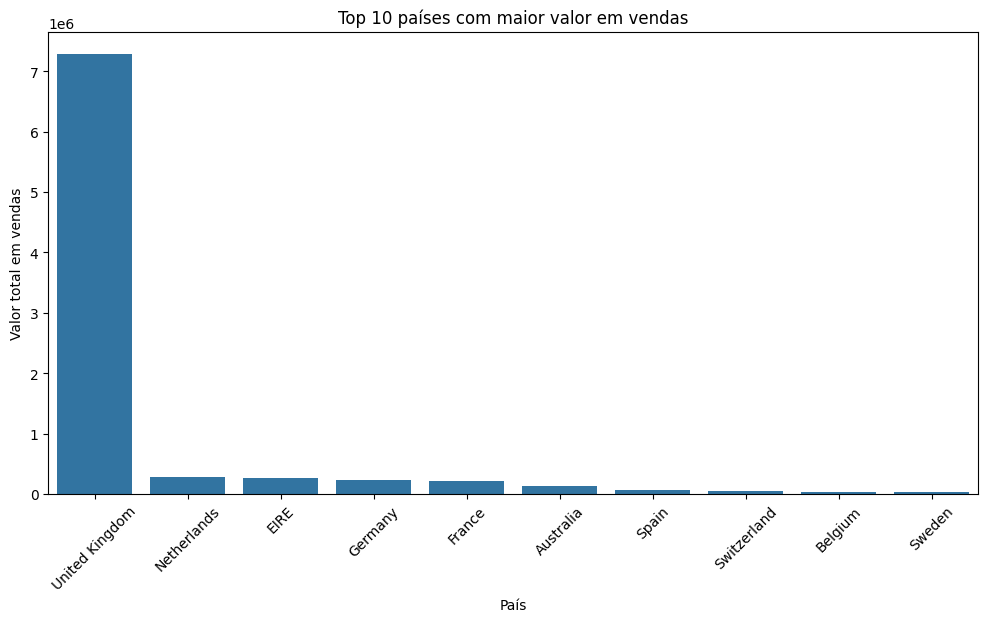

In [18]:
# Top 10 países com maior valor em vendas
top_10_countries = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
plt.title('Top 10 países com maior valor em vendas')
plt.ylabel('Valor total em vendas')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.show()

Insight: A maioria das vendas vem de alguns poucos países, sugerindo mercados prioritários para campanhas de marketing.

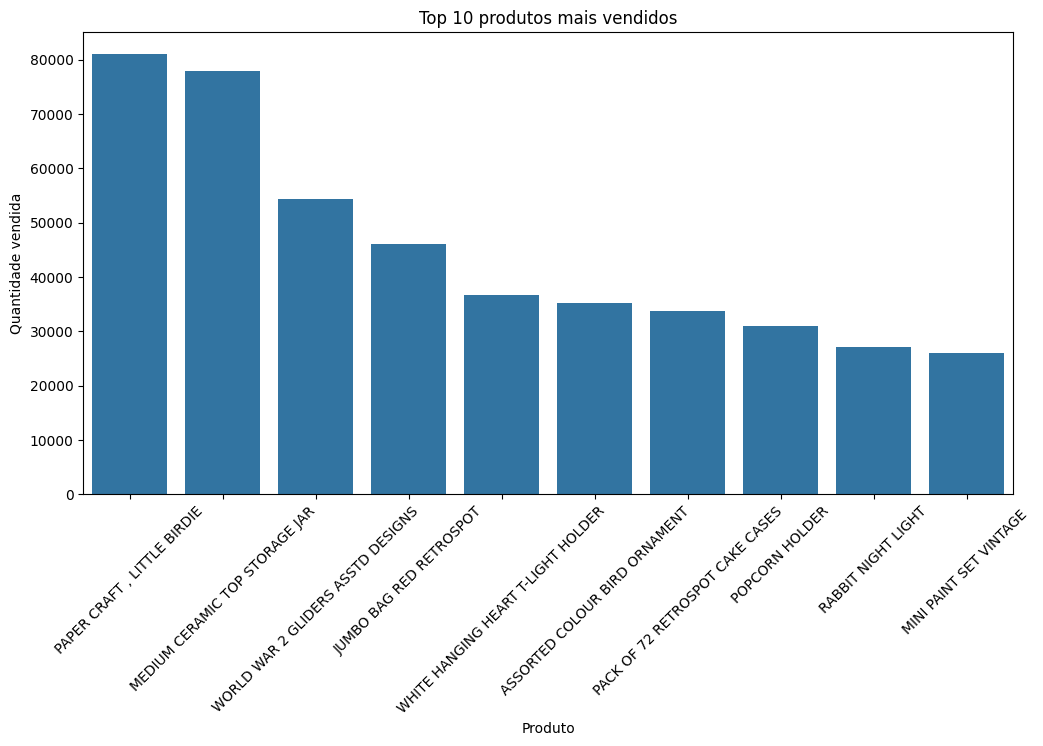

In [19]:
# Top 10 produtos mais vendidos
top_10_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.index, y=top_10_products.values)
plt.title('Top 10 produtos mais vendidos')
plt.ylabel('Quantidade vendida')
plt.xlabel('Produto')
plt.xticks(rotation=45)
plt.show()

Insight: Focar no estoque e marketing dos produtos mais vendidos pode aumentar ainda mais as vendas.

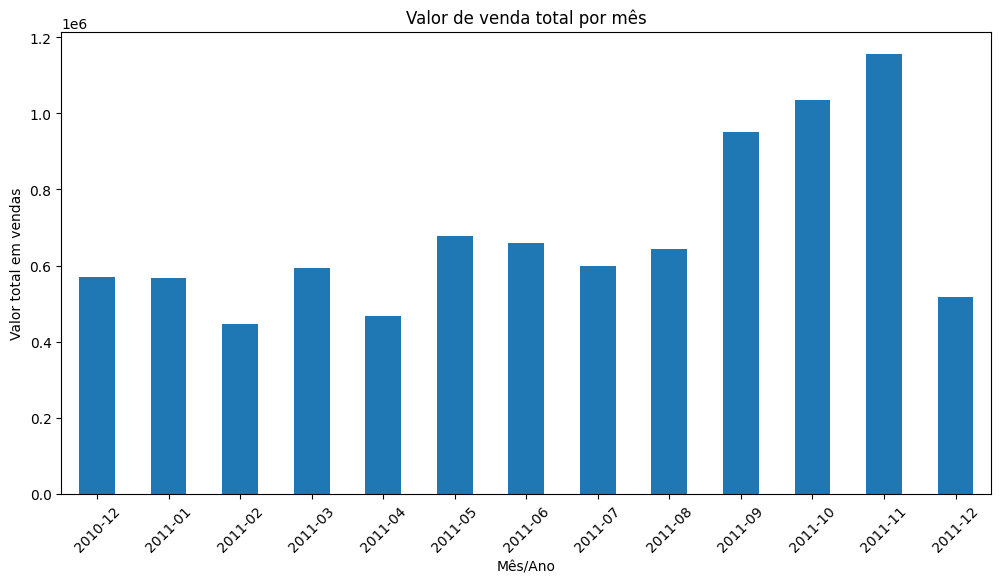

In [20]:
# Valor de venda total por mês
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')
sales_per_month = data.groupby('MonthYear')['TotalPrice'].sum()
plt.figure(figsize=(12, 6))
sales_per_month.plot(kind='bar')
plt.title('Valor de venda total por mês')
plt.ylabel('Valor total em vendas')
plt.xlabel('Mês/Ano')
plt.xticks(rotation=45)
plt.show()

Insight: Identificar meses de alta e baixa nas vendas pode ajudar a planejar promoções e campanhas de marketing.

<Figure size 1200x600 with 0 Axes>

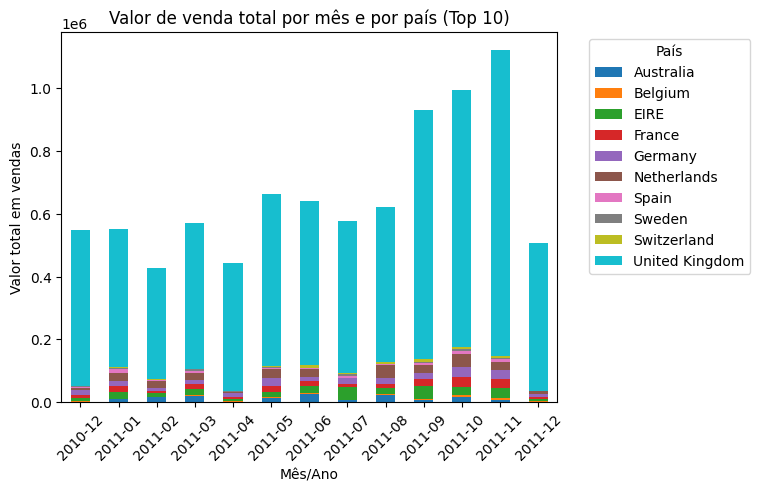

In [21]:
# Valor de venda total por mês e por país (considerando apenas os top 10 países)
top_10_countries_list = top_10_countries.index.tolist()
filtered_data = data[data['Country'].isin(top_10_countries_list)]
sales_per_month_country = filtered_data.groupby(['MonthYear', 'Country'])['TotalPrice'].sum().unstack()
plt.figure(figsize=(12, 6))
sales_per_month_country.plot(kind='bar', stacked=True)
plt.title('Valor de venda total por mês e por país (Top 10)')
plt.ylabel('Valor total em vendas')
plt.xlabel('Mês/Ano')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight: Diferentes países podem ter sazonalidades distintas, o que é útil para estratégias de marketing regionalizadas.

# Etapa 8- Calculando RFM

In [22]:
# Agrupar os dados por cliente e pedido/compra (InvoiceNo) e obter a data e o preço total do pedido
rfm_data = data.groupby(['CustomerID', 'InvoiceNo']).agg({'InvoiceDate': 'max', 'TotalPrice': 'sum'}).reset_index()

# Calcular a data da última compra no dataset (já calculado na Etapa 8)
ultima_data_compra = data['InvoiceDate'].max()

# Calcular R, F e M
rfm = rfm_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ultima_data_compra - x.max()).days,  # Recência
    'InvoiceNo': 'count',  # Frequência
    'TotalPrice': 'mean'  # Valor Monetário
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Exibir as primeiras linhas do dataset RFM
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.600000
1,12347.0,1,7,615.714286
2,12348.0,74,4,449.310000
3,12349.0,18,1,1757.550000
4,12350.0,309,1,334.400000


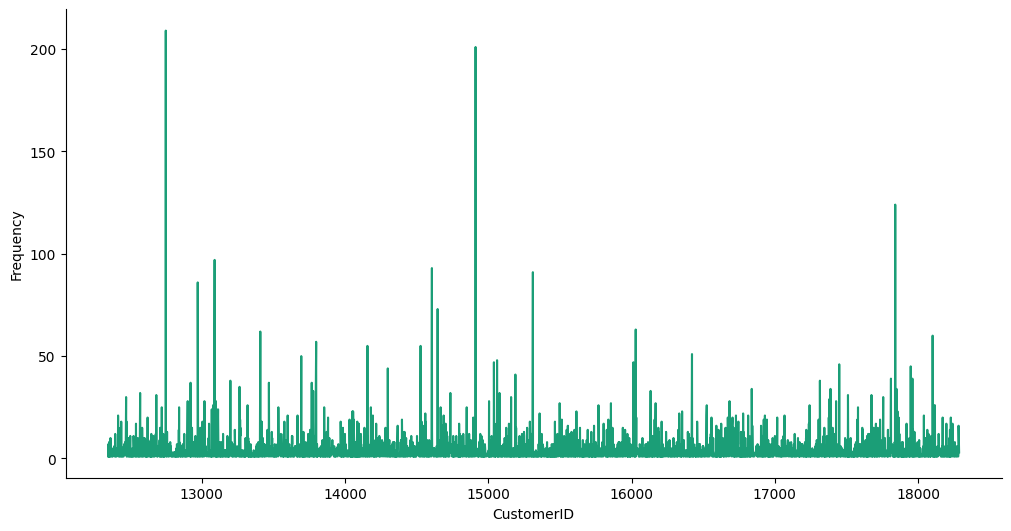

In [25]:
# @title CustomerID vs Frequency

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Frequency']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rfm.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Frequency')

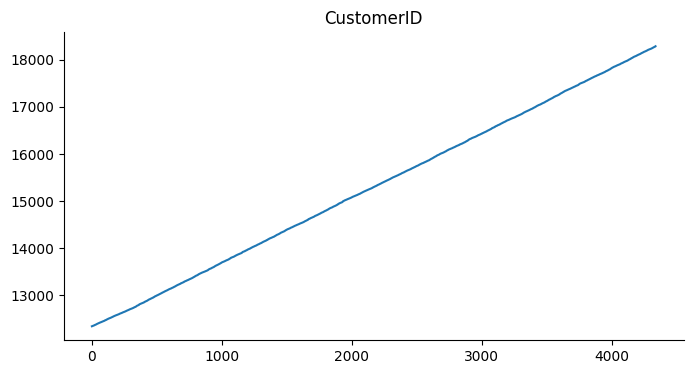

In [24]:
# @title CustomerID

from matplotlib import pyplot as plt
rfm['CustomerID'].plot(kind='line', figsize=(8, 4), title='CustomerID')
plt.gca().spines[['top', 'right']].set_visible(False)

Recência (R): Clientes que compraram recentemente têm maior probabilidade de fazer novas compras.

Frequência (F): Clientes frequentes são mais valiosos, pois indicam lealdade à marca.

Monetário (M): O valor gasto pelo cliente em média é crucial para identificar os clientes mais lucrativos.